## WCOA 2013 cruise data analysis

To download the data used in this tutorial, use the following command in the Terminal (Mac) or Git Bash (Windows).

```bash
git clone https://github.com/mlmldata2020/week01_wcoa_cruise.git
```

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Introduction to Pandas dataframes

We use Pandas to import the csv data file. 

Here, there is an optional `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [2]:
filename = 'data/week01_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

In [3]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


In [4]:
df.columns

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')

Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [5]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [6]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In [7]:
pd.unique(df['LATITUDE'])

array([48.2 , 48.3 , 48.37, 48.44, 48.5 , 48.53, 48.61, 48.66, 48.71,
       48.78, 48.81, 48.84, 47.97, 48.14, 47.96, 47.68, 47.13, 47.11,
       47.12, 47.34, 46.13, 46.17, 46.19, 46.25, 46.24, 46.12, 44.65,
       44.66, 44.2 , 41.99, 41.97, 41.96, 41.94, 41.9 , 40.25, 40.23,
       40.22, 40.21, 40.1 , 37.67, 37.94, 37.91, 37.87, 37.76, 37.75,
       36.8 , 36.78, 36.76, 36.73, 36.71, 36.69, 36.52, 36.7 ])

#### Exercise

Create a list of unique station ID’s (“STNNBR”) found in the survey data. Call it `stns`. How many unique stations are there in the data? 




### Summary statistics

A summary of the dataframe is given by the `.describe()` method.

In [8]:
df['CTDTMP'].describe()

count    969.000000
mean       8.993954
std        3.055917
min        1.738200
25%        7.292000
50%        8.328200
75%       10.752200
max       20.747400
Name: CTDTMP, dtype: float64

These summary statistics can also be accessed individually with similar syntax.

In [9]:
df['CTDTMP'].mean()

8.993954179566572

In [10]:
df['CTDTMP'].min()

1.7382

Alternate method using Numpy functions.

In [11]:
np.min(df['CTDTMP'])

1.7382

### Mathematical operations

Converting Celcius to Fahrenheit

In [12]:
df['CTDTMP_F'] = 9/5*df['CTDTMP'] + 32 

In [13]:
df['CTDTMP_F'].head()

0    38.63894
1    38.64236
2    39.85916
3    41.05328
4    41.82404
Name: CTDTMP_F, dtype: float64

In [14]:
df['CTDTMP'].head()

0    3.6883
1    3.6902
2    4.3662
3    5.0296
4    5.4578
Name: CTDTMP, dtype: float64

### Plotting

Plot latitude as a function of time.

(array([735084., 735087., 735090., 735093., 735096., 735099., 735102.,
        735105., 735108.]), <a list of 9 Text xticklabel objects>)

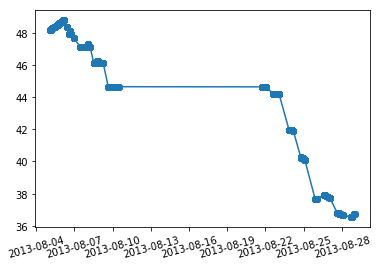

In [15]:
plt.figure()
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

The `pyplot` library automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

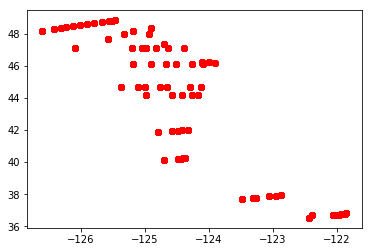

In [16]:
plt.figure()
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'ro')

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

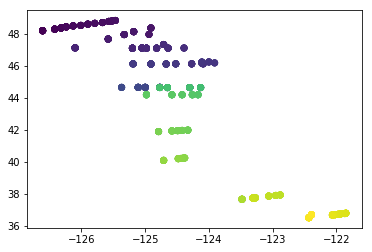

In [17]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

Note that the vertical coordinate is pressure (not depth, which indicates the bottom depth rather than the depth of the sample). To plot dissolved oxygen with depth:

Text(0,0.5,'pressure[dbar]')

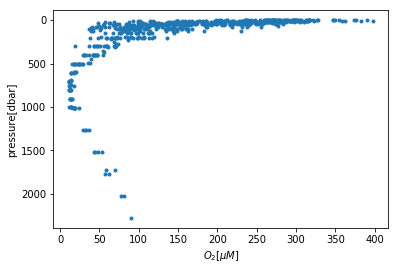

In [18]:
plt.figure()
plt.plot(df['OXYGEN'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

plt.xlabel('$O_2 [\mu M]$')
plt.ylabel('pressure[dbar]')

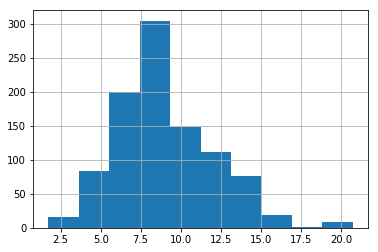

In [19]:
plt.figure()
df['CTDTMP'].hist()

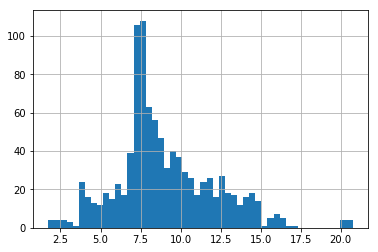

In [78]:
plt.figure()
df['CTDTMP'].hist(bins=50)

In [21]:
df.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA', 'CTDTMP_F'],
      dtype='object')

#### Exercises

* What scientific questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots (one PDF, one scatter plot)

## Slicing and subsetting data

In [32]:
df[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916


In [34]:
df.iloc[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916


In [39]:
df.loc[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328


In [41]:
df.loc[0:3,['CTDTMP','CTDPRS']]

,CTDTMP,CTDPRS
0,3.6883,999.5
1,3.6902,1000.8
2,4.3662,749.0
3,5.0296,503.9


#### Exercise

What do you expect to happen when you execute:
```
df[0:1]
df[:4]
df[:-1]
```

What do you expect to happen when you call:
```
df.iloc[0:4, 1:4]
df.loc[0:4, 1:4]
```

How are the two commands different?

Adapted from: https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html

### Subsetting Data using Criteria

In [57]:
df[df.LATITUDE > 40]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.20,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.20,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.20,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.20,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.20,...,2,2299.7,2,7.308,2,25.0,47.741,2,NaN,41.82404
5,2013-08-05 02:34:21,317W20130803,WCOA2013,1,2,11,1,6,2,48.20,...,2,2284.9,2,7.348,2,25.0,50.712,2,NaN,42.91682
6,2013-08-05 02:38:12,317W20130803,WCOA2013,1,2,11,1,7,2,48.20,...,2,2268.9,2,7.483,2,25.0,67.397,3,NaN,44.10248
7,2013-08-05 02:40:27,317W20130803,WCOA2013,1,2,11,1,8,2,48.20,...,2,2257.0,2,7.468,2,25.0,64.897,2,NaN,44.96900
8,2013-08-05 02:42:46,317W20130803,WCOA2013,1,2,11,1,9,2,48.20,...,2,2247.0,2,7.525,2,25.0,70.014,2,NaN,45.28904
9,2013-08-05 02:44:54,317W20130803,WCOA2013,1,2,11,1,10,2,48.20,...,2,2216.6,2,7.627,2,25.0,81.142,2,NaN,44.98610


In [56]:
df[df.LATITUDE <= 40]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
770,2013-08-25 21:23:35,32P020130821,WCOA2013,2,10,133,1,1,2,37.67,...,6,2430.4,6,7.493,2,25.0,73.346,2,NaN,35.12876
771,2013-08-25 21:32:13,32P020130821,WCOA2013,2,10,133,1,2,2,37.67,...,2,2427.6,2,7.467,2,25.0,69.812,2,NaN,35.30336
772,2013-08-25 21:40:44,32P020130821,WCOA2013,2,10,133,1,3,2,37.67,...,2,2424.3,2,7.442,2,25.0,65.502,2,NaN,35.55914
773,2013-08-25 21:49:45,32P020130821,WCOA2013,2,10,133,1,4,2,37.67,...,2,2413.7,2,7.400,2,25.0,60.170,2,NaN,36.10526
774,2013-08-25 21:57:55,32P020130821,WCOA2013,2,10,133,1,5,2,37.67,...,2,2401.4,2,7.374,2,25.0,57.739,2,NaN,36.92894
775,2013-08-25 22:05:06,32P020130821,WCOA2013,2,10,133,1,6,2,37.67,...,2,2388.0,2,7.344,2,25.0,52.950,3,NaN,38.00444
776,2013-08-25 22:12:44,32P020130821,WCOA2013,2,10,133,1,7,2,37.67,...,2,2367.2,2,7.315,2,25.0,49.073,2,NaN,39.27974
777,2013-08-25 22:17:31,32P020130821,WCOA2013,2,10,133,1,8,2,37.67,...,2,2359.8,2,7.309,2,25.0,48.842,2,NaN,39.78662
778,2013-08-25 22:23:24,32P020130821,WCOA2013,2,10,133,1,9,2,37.67,...,2,2353.3,2,7.305,3,25.0,48.720,2,NaN,40.17236
779,2013-08-25 22:29:04,32P020130821,WCOA2013,2,10,133,1,10,2,37.67,...,2,2339.2,2,7.303,2,25.0,48.116,2,NaN,41.14220


In [53]:
dfsub = df[(df.CTDPRS <= 10) & (df.LATITUDE > 40)]

In [55]:
dfsub

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
18,2013-08-05 03:00:52,317W20130803,WCOA2013,1,2,11,1,19,4,48.20,...,9,NaN,9,NaN,9,NaN,NaN,9,NaN,56.54660
19,2013-08-05 03:01:10,317W20130803,WCOA2013,1,2,11,1,20,2,48.20,...,2,2189.1,6,7.983,3,25.0,155.043,2,NaN,56.54570
38,2013-08-05 06:37:22,317W20130803,WCOA2013,1,2,12,1,19,2,48.30,...,9,2180.0,6,7.980,3,25.0,152.868,2,NaN,57.72218
39,2013-08-05 06:37:42,317W20130803,WCOA2013,1,2,12,1,20,2,48.30,...,2,NaN,9,7.981,2,25.0,NaN,5,NaN,57.72290
58,2013-08-05 10:41:19,317W20130803,WCOA2013,1,2,13,1,19,2,48.37,...,2,2178.7,2,7.931,2,25.0,142.629,2,NaN,55.69844
59,2013-08-05 10:43:57,317W20130803,WCOA2013,1,2,13,1,20,2,48.37,...,9,NaN,9,7.934,2,25.0,136.898,3,NaN,55.71320
60,2013-08-05 10:44:10,317W20130803,WCOA2013,1,2,13,1,21,2,48.37,...,2,2179.6,2,7.932,2,25.0,144.562,2,NaN,55.70906
78,2013-08-05 13:35:12,317W20130803,WCOA2013,1,2,14,1,18,2,48.44,...,9,NaN,9,7.919,2,25.0,138.189,2,0.7937,54.85172
79,2013-08-05 13:35:29,317W20130803,WCOA2013,1,2,14,1,19,2,48.44,...,2,2188.5,6,7.919,2,25.0,135.410,3,NaN,54.85064
91,2013-08-05 15:43:19,317W20130803,WCOA2013,1,2,15,1,12,2,48.50,...,2,2195.1,2,7.926,2,25.0,141.355,3,1.8270,54.82472


### Exercises

* Select a subset of rows in the `df` DataFrame that contains data from a pressure range between 500 and 1000 dbar. How many rows did you end up with? What did your neighbor get?

* You can use the isin command in Python to query a DataFrame based upon a list of values as follows:
```
df[df['STNNBR'].isin([listGoesHere])]
```
Use the `isin` function to find all samples from station numbers 11 and 12.

In [64]:
df[df['STNNBR'].isin([11,12])]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2,2299.7,2,7.308,2,25.0,47.741,2,NaN,41.82404
5,2013-08-05 02:34:21,317W20130803,WCOA2013,1,2,11,1,6,2,48.2,...,2,2284.9,2,7.348,2,25.0,50.712,2,NaN,42.91682
6,2013-08-05 02:38:12,317W20130803,WCOA2013,1,2,11,1,7,2,48.2,...,2,2268.9,2,7.483,2,25.0,67.397,3,NaN,44.10248
7,2013-08-05 02:40:27,317W20130803,WCOA2013,1,2,11,1,8,2,48.2,...,2,2257.0,2,7.468,2,25.0,64.897,2,NaN,44.96900
8,2013-08-05 02:42:46,317W20130803,WCOA2013,1,2,11,1,9,2,48.2,...,2,2247.0,2,7.525,2,25.0,70.014,2,NaN,45.28904
9,2013-08-05 02:44:54,317W20130803,WCOA2013,1,2,11,1,10,2,48.2,...,2,2216.6,2,7.627,2,25.0,81.142,2,NaN,44.98610


In [67]:
df[np.isfinite(df['CTDTMP'])]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.20,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.20,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.20,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.20,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.20,...,2,2299.7,2,7.308,2,25.0,47.741,2,NaN,41.82404
5,2013-08-05 02:34:21,317W20130803,WCOA2013,1,2,11,1,6,2,48.20,...,2,2284.9,2,7.348,2,25.0,50.712,2,NaN,42.91682
6,2013-08-05 02:38:12,317W20130803,WCOA2013,1,2,11,1,7,2,48.20,...,2,2268.9,2,7.483,2,25.0,67.397,3,NaN,44.10248
7,2013-08-05 02:40:27,317W20130803,WCOA2013,1,2,11,1,8,2,48.20,...,2,2257.0,2,7.468,2,25.0,64.897,2,NaN,44.96900
8,2013-08-05 02:42:46,317W20130803,WCOA2013,1,2,11,1,9,2,48.20,...,2,2247.0,2,7.525,2,25.0,70.014,2,NaN,45.28904
9,2013-08-05 02:44:54,317W20130803,WCOA2013,1,2,11,1,10,2,48.20,...,2,2216.6,2,7.627,2,25.0,81.142,2,NaN,44.98610


In [68]:
df[~np.isfinite(df['CTDTMP'])]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
732,2013-08-24 19:49:33,32P020130821,WCOA2013,2,9,114,1,7,2,40.23,...,2,2223.8,2,7.652,2,25.0,89.558,2,NaN,NaN
741,2013-08-24 20:42:52,32P020130821,WCOA2013,2,9,113,1,7,2,40.22,...,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN
823,2013-08-26 21:30:00,32P020130821,WCOA2013,2,10,117,1,1,2,37.76,...,2,2309.5,2,NaN,5,NaN,NaN,5,NaN,NaN


### Exercises

pH values are contained in the `df['PH_TOT']` DataArray

Quality control flags for pH are contained in the `df['PH_TOT_FLAG_W']` DataArray.

World Ocean Circulation Experiment (WOCE) quality control flags are used: 
* 2 = good value
* 3 = questionable value
* 4 = bad value 
* 5 = value not reported
* 6 = mean of replicate measurements
* 9 = sample not drawn.


1. Create a new DataFrame called `dfsub1` that excludes all bad, questionable and missing pH values. Plot the probability density function for pH.

2. Create a new DataFrame called `dfsub2` that excludes all bad, questionable and missing pH and CTD oxygen values. Plot oxygen vs. pH.

In [123]:
subset2 = ((df['PH_TOT_FLAG_W'].isin([2,6])) & 
          (df['CTDOXY_FLAG_W'].isin([2,6])))
dfsub2 = df[subset2]

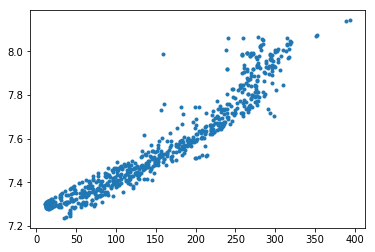

In [124]:
plt.figure()
plt.plot(dfsub2['CTDOXY'],dfsub2['PH_TOT'],'.')

### Three ways to fit a linear model in Python

In [140]:
p = np.polyfit(dfsub2['CTDOXY'],dfsub2['PH_TOT'],1)

In [141]:
p

array([2.31182987e-03, 7.20147772e+00])

In [142]:
from scipy import stats
result = stats.linregress(dfsub2['CTDOXY'],dfsub2['PH_TOT'])

In [143]:
result

LinregressResult(slope=0.002311829870913683, intercept=7.201477722101018, rvalue=0.9506617834616196, pvalue=0.0, stderr=2.7903190100856427e-05)

In [144]:
result[0]

0.002311829870913683

In [145]:
import statsmodels.formula.api as smf
smres = smf.ols('PH_TOT ~ 1 + CTDOXY',dfsub2).fit()

In [146]:
smres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PH_TOT   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     6864.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        07:36:47   Log-Likelihood:                 916.58
No. Observations:                 733   AIC:                            -1829.
Df Residuals:                     731   BIC:                            -1820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2015      0.005   1435.650      0.000       7.192       7.211
CTDOXY         0.0023   2.79e-05     82.852      0.000       0.002       0.002
==============================================================================
Omnibus:                      126.328   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.816
Skew:                           0.937   Prob(JB):                     1.42e-62
Kurtosis:                       5.412   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise

Plot the linear model with the data.